In [ ]:
! whereis python

In [1]:
from transformers import pipeline
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd


classifier = pipeline("sentiment-analysis")
classifier("I've been waiting for a HuggingFace course my whole life.")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.9598051905632019}]

In [2]:
classifier(
    ["I've been waiting for a HuggingFace course my whole life.", "I hate this so much!"]
)

[{'label': 'POSITIVE', 'score': 0.9598051905632019},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

In [6]:
embedding_model = pipeline('feature-extraction', model='distilbert-base-cased')


In [28]:
texts = [
    'Tonight the dow jones went up by 6% marking a 3 month high.',
    'The current economic state is going well.',
    
    'Soccer is my favorite sport.  I hate baseball',
    'Basketball is cool, but hockey is cooler.', 
    
    'King', 
    'Queen',
    'Man',
    'Woman'
]

In [7]:
texts_embeddings = embedding_model(texts, return_tensors=False)

In [29]:
embeddings = []

for item in texts_embeddings:
    embeddings.append(item[0][0])
print(len(embeddings[0]))




768


In [30]:
pca = PCA(n_components=2)

In [31]:
pca.fit(embeddings)

PCA(n_components=2)

In [32]:
pca_values = pca.transform(embeddings)

In [33]:
df = pd.DataFrame(pca_values, columns=['x', 'y'])
df['text'] = texts
df.head()

,x,y,text
0,0.977957,2.001674,Tonight the dow jones went up by 6% marking a ...
1,0.643208,1.646990,The current economic state is going well.
2,2.134012,-1.599711,Soccer is my favorite sport. I hate baseball
3,2.039003,-0.738567,"Basketball is cool, but hockey is cooler."
4,-1.379197,-0.260193,King


<Axes: xlabel='x', ylabel='y'>

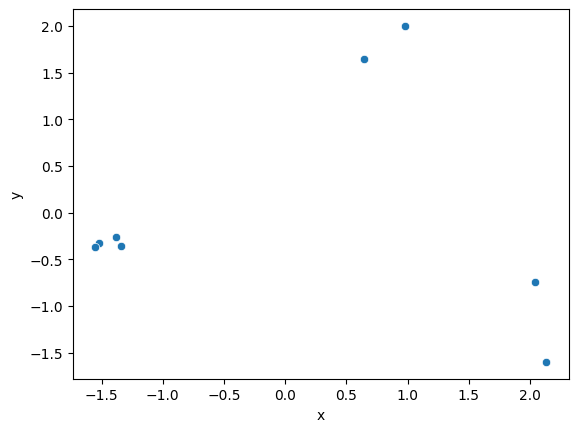

In [34]:
sns.scatterplot(data=df, x='x', y='y')

## Deeplearning AI example

In [35]:
in_1 = "Missing flamingo discovered at swimming pool"

in_2 = "Sea otter spotted on surfboard by beach"

in_3 = "Baby panda enjoys boat ride"


in_4 = "Breakfast themed food truck beloved by all!"

in_5 = "New curry restaurant aims to please!"


in_6 = "Python developers are wonderful people"

in_7 = "TypeScript, C++ or Java? All are great!" 


input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7]

In [36]:
embeddings = []
for input_text in input_text_lst_news:
    emb = embedding_model(input_text)[0][0]
    embeddings.append(emb)
    
embeddings_array = np.array(embeddings) 

In [37]:
embeddings_array

array([[ 0.33164725,  0.00627816, -0.22809643, ..., -0.20232885,
         0.26160347, -0.03164642],
       [ 0.29033113, -0.06734173, -0.17860225, ..., -0.35694861,
         0.43531209,  0.14580417],
       [ 0.32287705,  0.14455755, -0.20088986, ..., -0.14209484,
         0.26665843,  0.1649759 ],
       ...,
       [ 0.43300816,  0.14744906, -0.03023342, ...,  0.01417825,
         0.19578566,  0.07927263],
       [ 0.47073305,  0.00395061, -0.11662041, ..., -0.0711899 ,
         0.18775891,  0.15612444],
       [ 0.38762268,  0.09408137,  0.13297538, ..., -0.03701077,
         0.16724022,  0.15070538]])

In [38]:
pca = PCA(2)

pca.fit(embeddings_array)

PCA(n_components=2)

In [39]:
pca_values = pca.transform(embeddings_array)

In [40]:
pca_values

array([[ 2.10158527,  0.22385671],
       [ 2.40700223,  0.59374119],
       [ 0.65211129, -0.92661631],
       [-1.0285655 , -1.07062487],
       [-1.05164121, -1.27184944],
       [-1.31046091,  1.31676947],
       [-1.77003117,  1.13472326]])

In [41]:
df = pd.DataFrame(pca_values, columns=['x', 'y'])
df['text'] = input_text_lst_news
df.head()



,x,y,text
0,2.101585,0.223857,Missing flamingo discovered at swimming pool
1,2.407002,0.593741,Sea otter spotted on surfboard by beach
2,0.652111,-0.926616,Baby panda enjoys boat ride
3,-1.028565,-1.070625,Breakfast themed food truck beloved by all!
4,-1.051641,-1.271849,New curry restaurant aims to please!


In [42]:
## THIS DOES NOT WORK FOR ME
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)


# plotly.offline.init_notebook_mode(connected=True)

px.scatter(df, x='x', y='y', hover_data=['text']);

<Axes: xlabel='x', ylabel='y'>

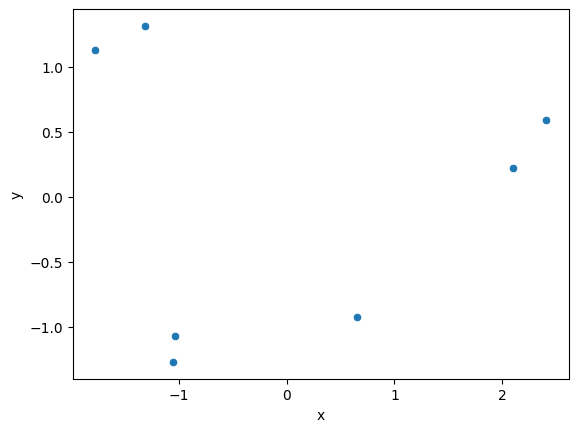

In [43]:
sns.scatterplot(data=df, x='x', y='y')

In [23]:
# df.to_clipboard()